In [21]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv, GCNConv
from torch_geometric.datasets import Planetoid
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import networkx as nx

# Load the Cora dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')

class GCN(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, 16)
        self.conv2 = GCNConv(16, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model, optimizer, and data
model = GCN(dataset.num_features, dataset.num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
data = dataset[0]

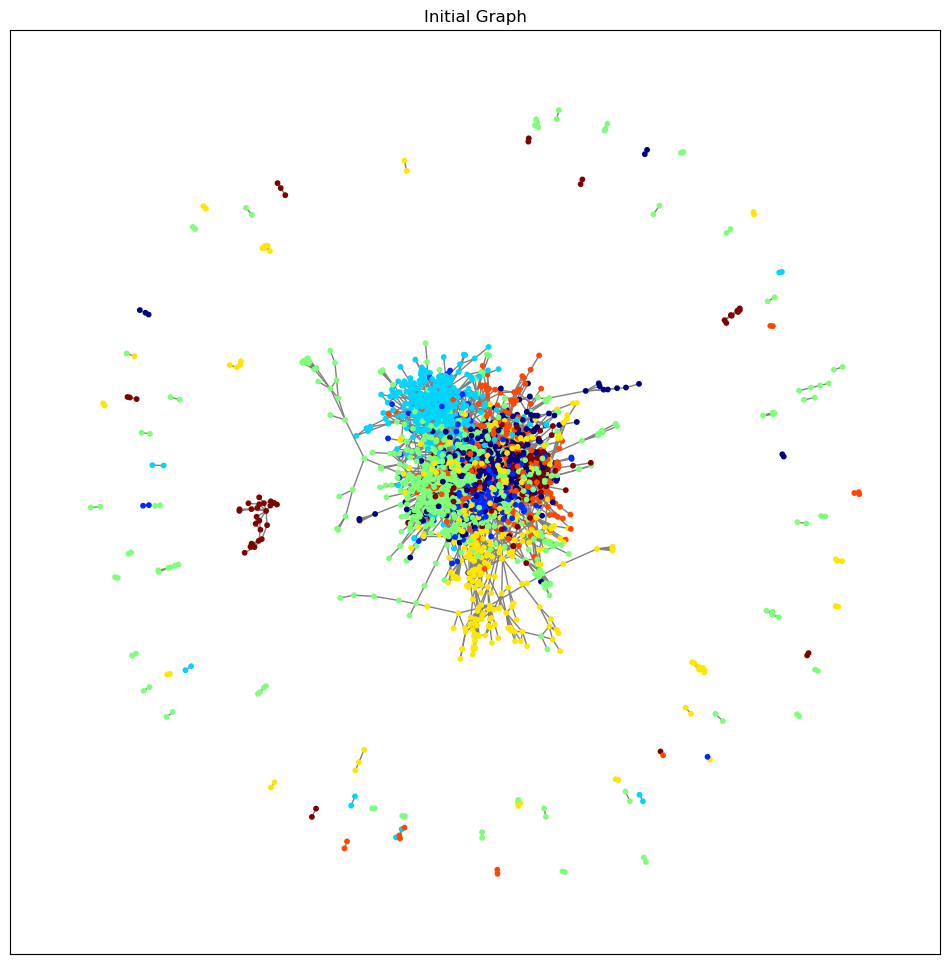

In [22]:
# Training the GCN model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Testing the GCN model
def test():
    model.eval()
    logits, accs = model(data), []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs

# Function to plot training and validation metrics
def plot_metrics(epochs, train_losses, train_accs, val_accs):
    plt.figure(figsize=(12, 6))
    
    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.legend()
    plt.grid(False)
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accs, label='Training Accuracy')
    plt.plot(epochs, val_accs, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy over Epochs')
    plt.legend()
    plt.grid(False)
    
    plt.tight_layout()
    plt.show()

# Function to draw the graph
def draw_graph(data, title):
    G = to_networkx(data, to_undirected=True)
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color=data.y.numpy(), cmap=plt.cm.jet, label = None)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray')
#     nx.draw_networkx_labels(G, pos, font_size=12)
    plt.title(title)
    plt.show()

# Drawing the initial graph
draw_graph(data, "Initial Graph")

Epoch: 10, Loss: 0.9142, Train Acc: 0.9571, Val Acc: 0.7400, Test Acc: 0.7580
Epoch: 20, Loss: 0.2804, Train Acc: 1.0000, Val Acc: 0.7680, Test Acc: 0.7920
Epoch: 30, Loss: 0.1153, Train Acc: 1.0000, Val Acc: 0.7680, Test Acc: 0.7830
Epoch: 40, Loss: 0.0653, Train Acc: 1.0000, Val Acc: 0.7740, Test Acc: 0.7990
Epoch: 50, Loss: 0.0488, Train Acc: 1.0000, Val Acc: 0.7760, Test Acc: 0.7870
Epoch: 60, Loss: 0.0491, Train Acc: 1.0000, Val Acc: 0.7740, Test Acc: 0.7970
Epoch: 70, Loss: 0.0424, Train Acc: 1.0000, Val Acc: 0.7640, Test Acc: 0.7950
Epoch: 80, Loss: 0.0609, Train Acc: 1.0000, Val Acc: 0.7820, Test Acc: 0.8020
Epoch: 90, Loss: 0.0424, Train Acc: 1.0000, Val Acc: 0.7760, Test Acc: 0.7940
Epoch: 100, Loss: 0.0297, Train Acc: 1.0000, Val Acc: 0.7780, Test Acc: 0.7980
Epoch: 110, Loss: 0.0456, Train Acc: 1.0000, Val Acc: 0.7760, Test Acc: 0.8000
Epoch: 120, Loss: 0.0340, Train Acc: 1.0000, Val Acc: 0.7820, Test Acc: 0.7970
Epoch: 130, Loss: 0.0276, Train Acc: 1.0000, Val Acc: 0.7760,

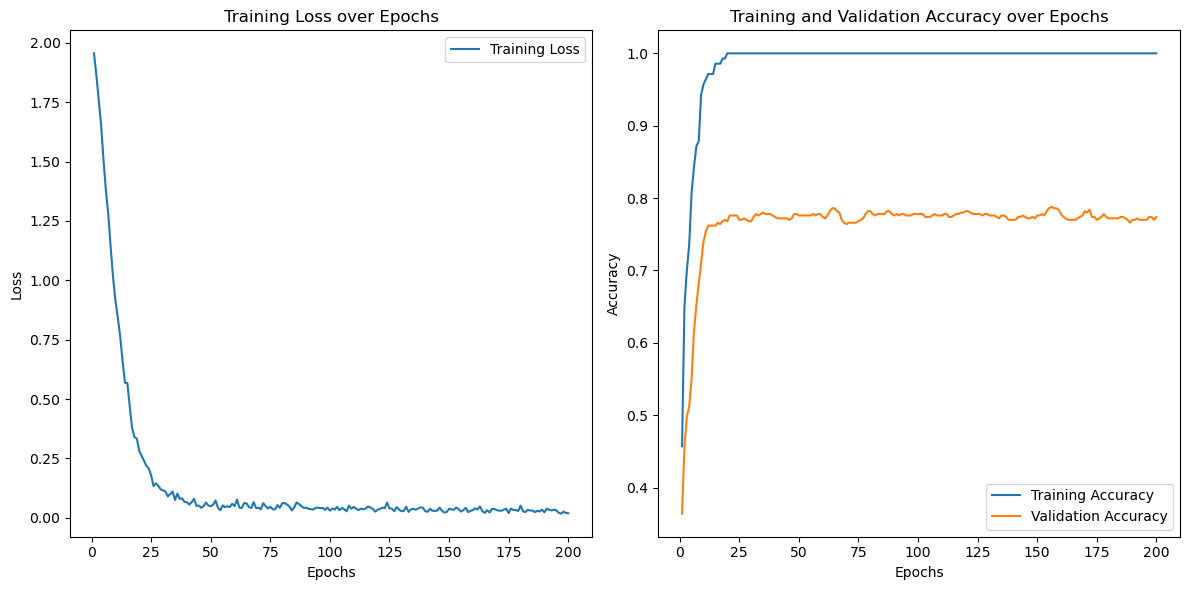

In [23]:
# Training loop with metric collection
epochs = []
train_losses = []
train_accs = []
val_accs = []

for epoch in range(200):
    loss = train()
    train_acc, val_acc, test_acc = test()
    
    # Collect metrics
    epochs.append(epoch + 1)
    train_losses.append(loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}')

# Final evaluation
train_acc, val_acc, test_acc = test()
print(f'Final Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}, Test Accuracy: {test_acc:.4f}')

# Plot metrics
plot_metrics(epochs, train_losses, train_accs, val_accs)

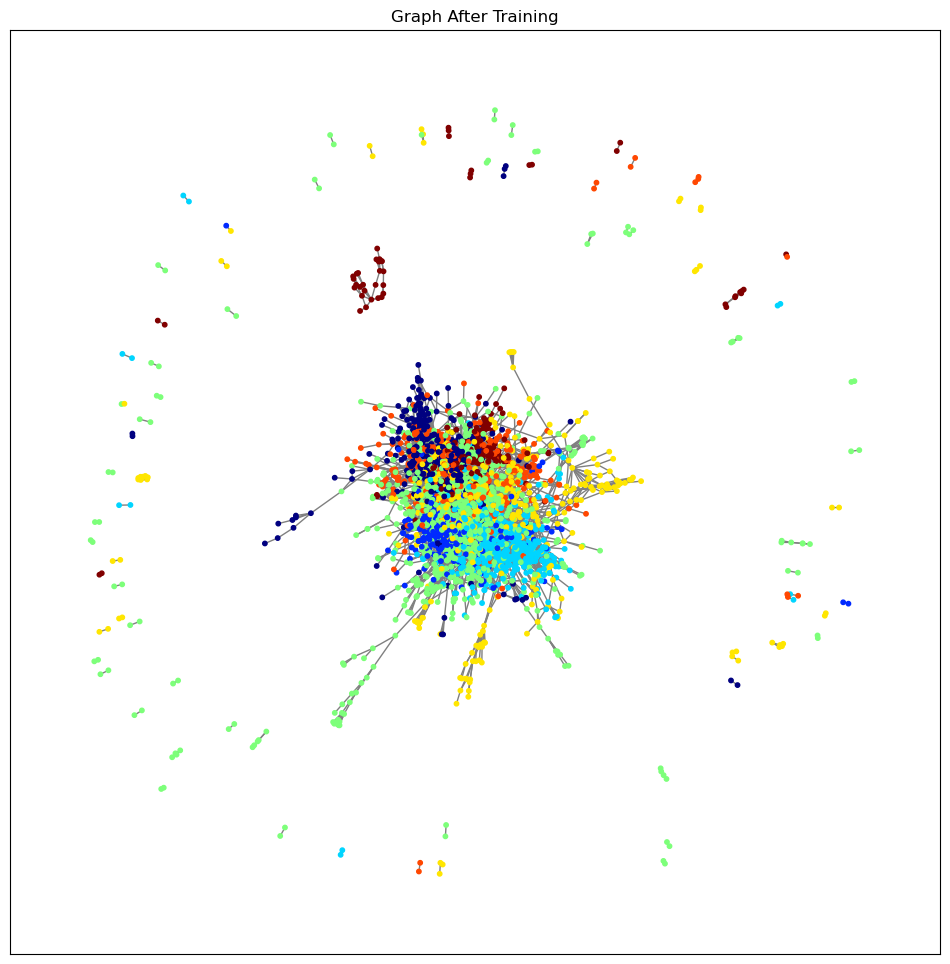

In [24]:
# Drawing the graph after training
draw_graph(data, "Graph After Training")

# Graph Attention Network (GAT) example

### Setting Up the GAT

First, ensure you have PyTorch and PyG installed. If not, you can install them using:
```bash
pip install torch torch-geometric
```

### Example: Graph Attention Network (GAT) on Cora Dataset

Epoch: 10, Loss: 1.1222, Train Acc: 0.9643, Val Acc: 0.7880, Test Acc: 0.7890
Epoch: 20, Loss: 0.8273, Train Acc: 0.9786, Val Acc: 0.7900, Test Acc: 0.8090
Epoch: 30, Loss: 0.7406, Train Acc: 0.9929, Val Acc: 0.7880, Test Acc: 0.8160
Epoch: 40, Loss: 0.6382, Train Acc: 0.9929, Val Acc: 0.7880, Test Acc: 0.8120
Epoch: 50, Loss: 0.6164, Train Acc: 1.0000, Val Acc: 0.7840, Test Acc: 0.8210
Epoch: 60, Loss: 0.4990, Train Acc: 1.0000, Val Acc: 0.7820, Test Acc: 0.8130
Epoch: 70, Loss: 0.4101, Train Acc: 1.0000, Val Acc: 0.7840, Test Acc: 0.8080
Epoch: 80, Loss: 0.4062, Train Acc: 1.0000, Val Acc: 0.7860, Test Acc: 0.8120
Epoch: 90, Loss: 0.3891, Train Acc: 1.0000, Val Acc: 0.7820, Test Acc: 0.8060
Epoch: 100, Loss: 0.3782, Train Acc: 1.0000, Val Acc: 0.7900, Test Acc: 0.8060
Epoch: 110, Loss: 0.5527, Train Acc: 1.0000, Val Acc: 0.7780, Test Acc: 0.7970
Epoch: 120, Loss: 0.4701, Train Acc: 1.0000, Val Acc: 0.7700, Test Acc: 0.8010
Epoch: 130, Loss: 0.4221, Train Acc: 1.0000, Val Acc: 0.7740,

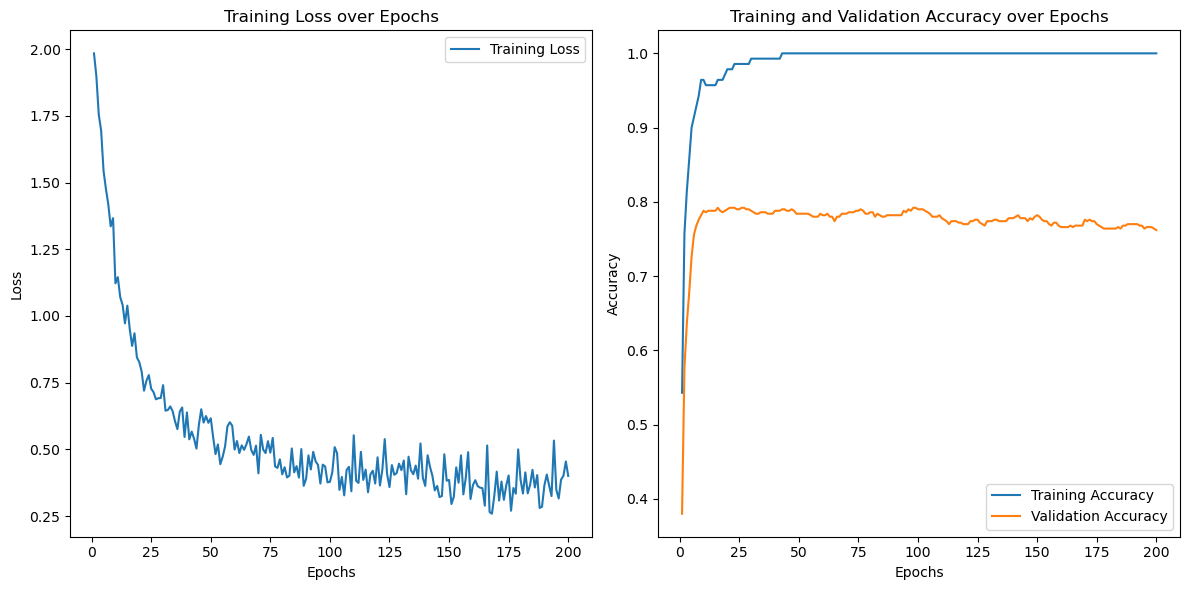

In [14]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.datasets import Planetoid
import matplotlib.pyplot as plt

# Load the Cora dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')

class GAT(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GAT, self).__init__()
        self.conv1 = GATConv(in_channels, 8, heads=8, dropout=0.6)
        self.conv2 = GATConv(8 * 8, out_channels, heads=1, concat=False, dropout=0.6)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model, optimizer, and data
model = GAT(dataset.num_features, dataset.num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
data = dataset[0]

# Training the GAT model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Testing the GAT model
def test():
    model.eval()
    logits, accs = model(data), []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs

# Function to plot training and validation metrics
def plot_metrics(epochs, train_losses, train_accs, val_accs):
    plt.figure(figsize=(12, 6))
    
    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.legend()
    plt.grid(False)
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accs, label='Training Accuracy')
    plt.plot(epochs, val_accs, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy over Epochs')
    plt.legend()
    plt.grid(False)
    
    plt.tight_layout()
    plt.show()

# Training loop with metric collection
epochs = []
train_losses = []
train_accs = []
val_accs = []

for epoch in range(200):
    loss = train()
    train_acc, val_acc, test_acc = test()
    
    # Collect metrics
    epochs.append(epoch + 1)
    train_losses.append(loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}')

# Final evaluation
train_acc, val_acc, test_acc = test()
print(f'Final Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}, Test Accuracy: {test_acc:.4f}')

# Plot metrics
plot_metrics(epochs, train_losses, train_accs, val_accs)

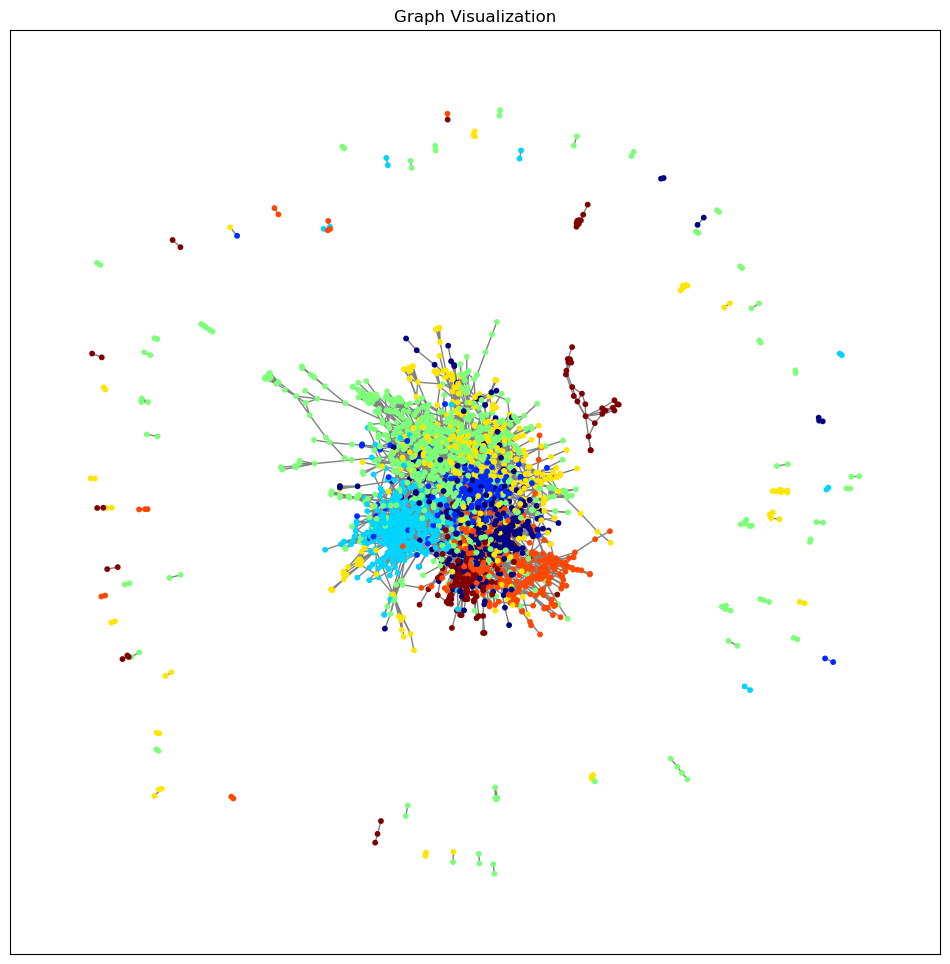

In [15]:
# Function to draw the graph without showing node IDs
def draw_graph(data):
    from torch_geometric.utils import to_networkx
    import networkx as nx
    import matplotlib.pyplot as plt

    G = to_networkx(data, to_undirected=True)
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color=data.y.numpy(), cmap=plt.cm.jet)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray')
    # Remove the line that draws the node labels
    # nx.draw_networkx_labels(G, pos, font_size=12)
    plt.title("Graph Visualization")
    plt.show()

# Draw the graph
draw_graph(data)
